In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
import disp_functions as df # Helper Functions
plt.rcParams["figure.dpi"] = 300

### Individual game score selection

In [2]:
# Create a dictionary of the teams players
#     Values are the dataframe file
path = './DATA/2018/'
NC = df.team_dict(path,'Virginia',drop=[0])
Gz = df.team_dict(path,'Villanova',drop=[0])

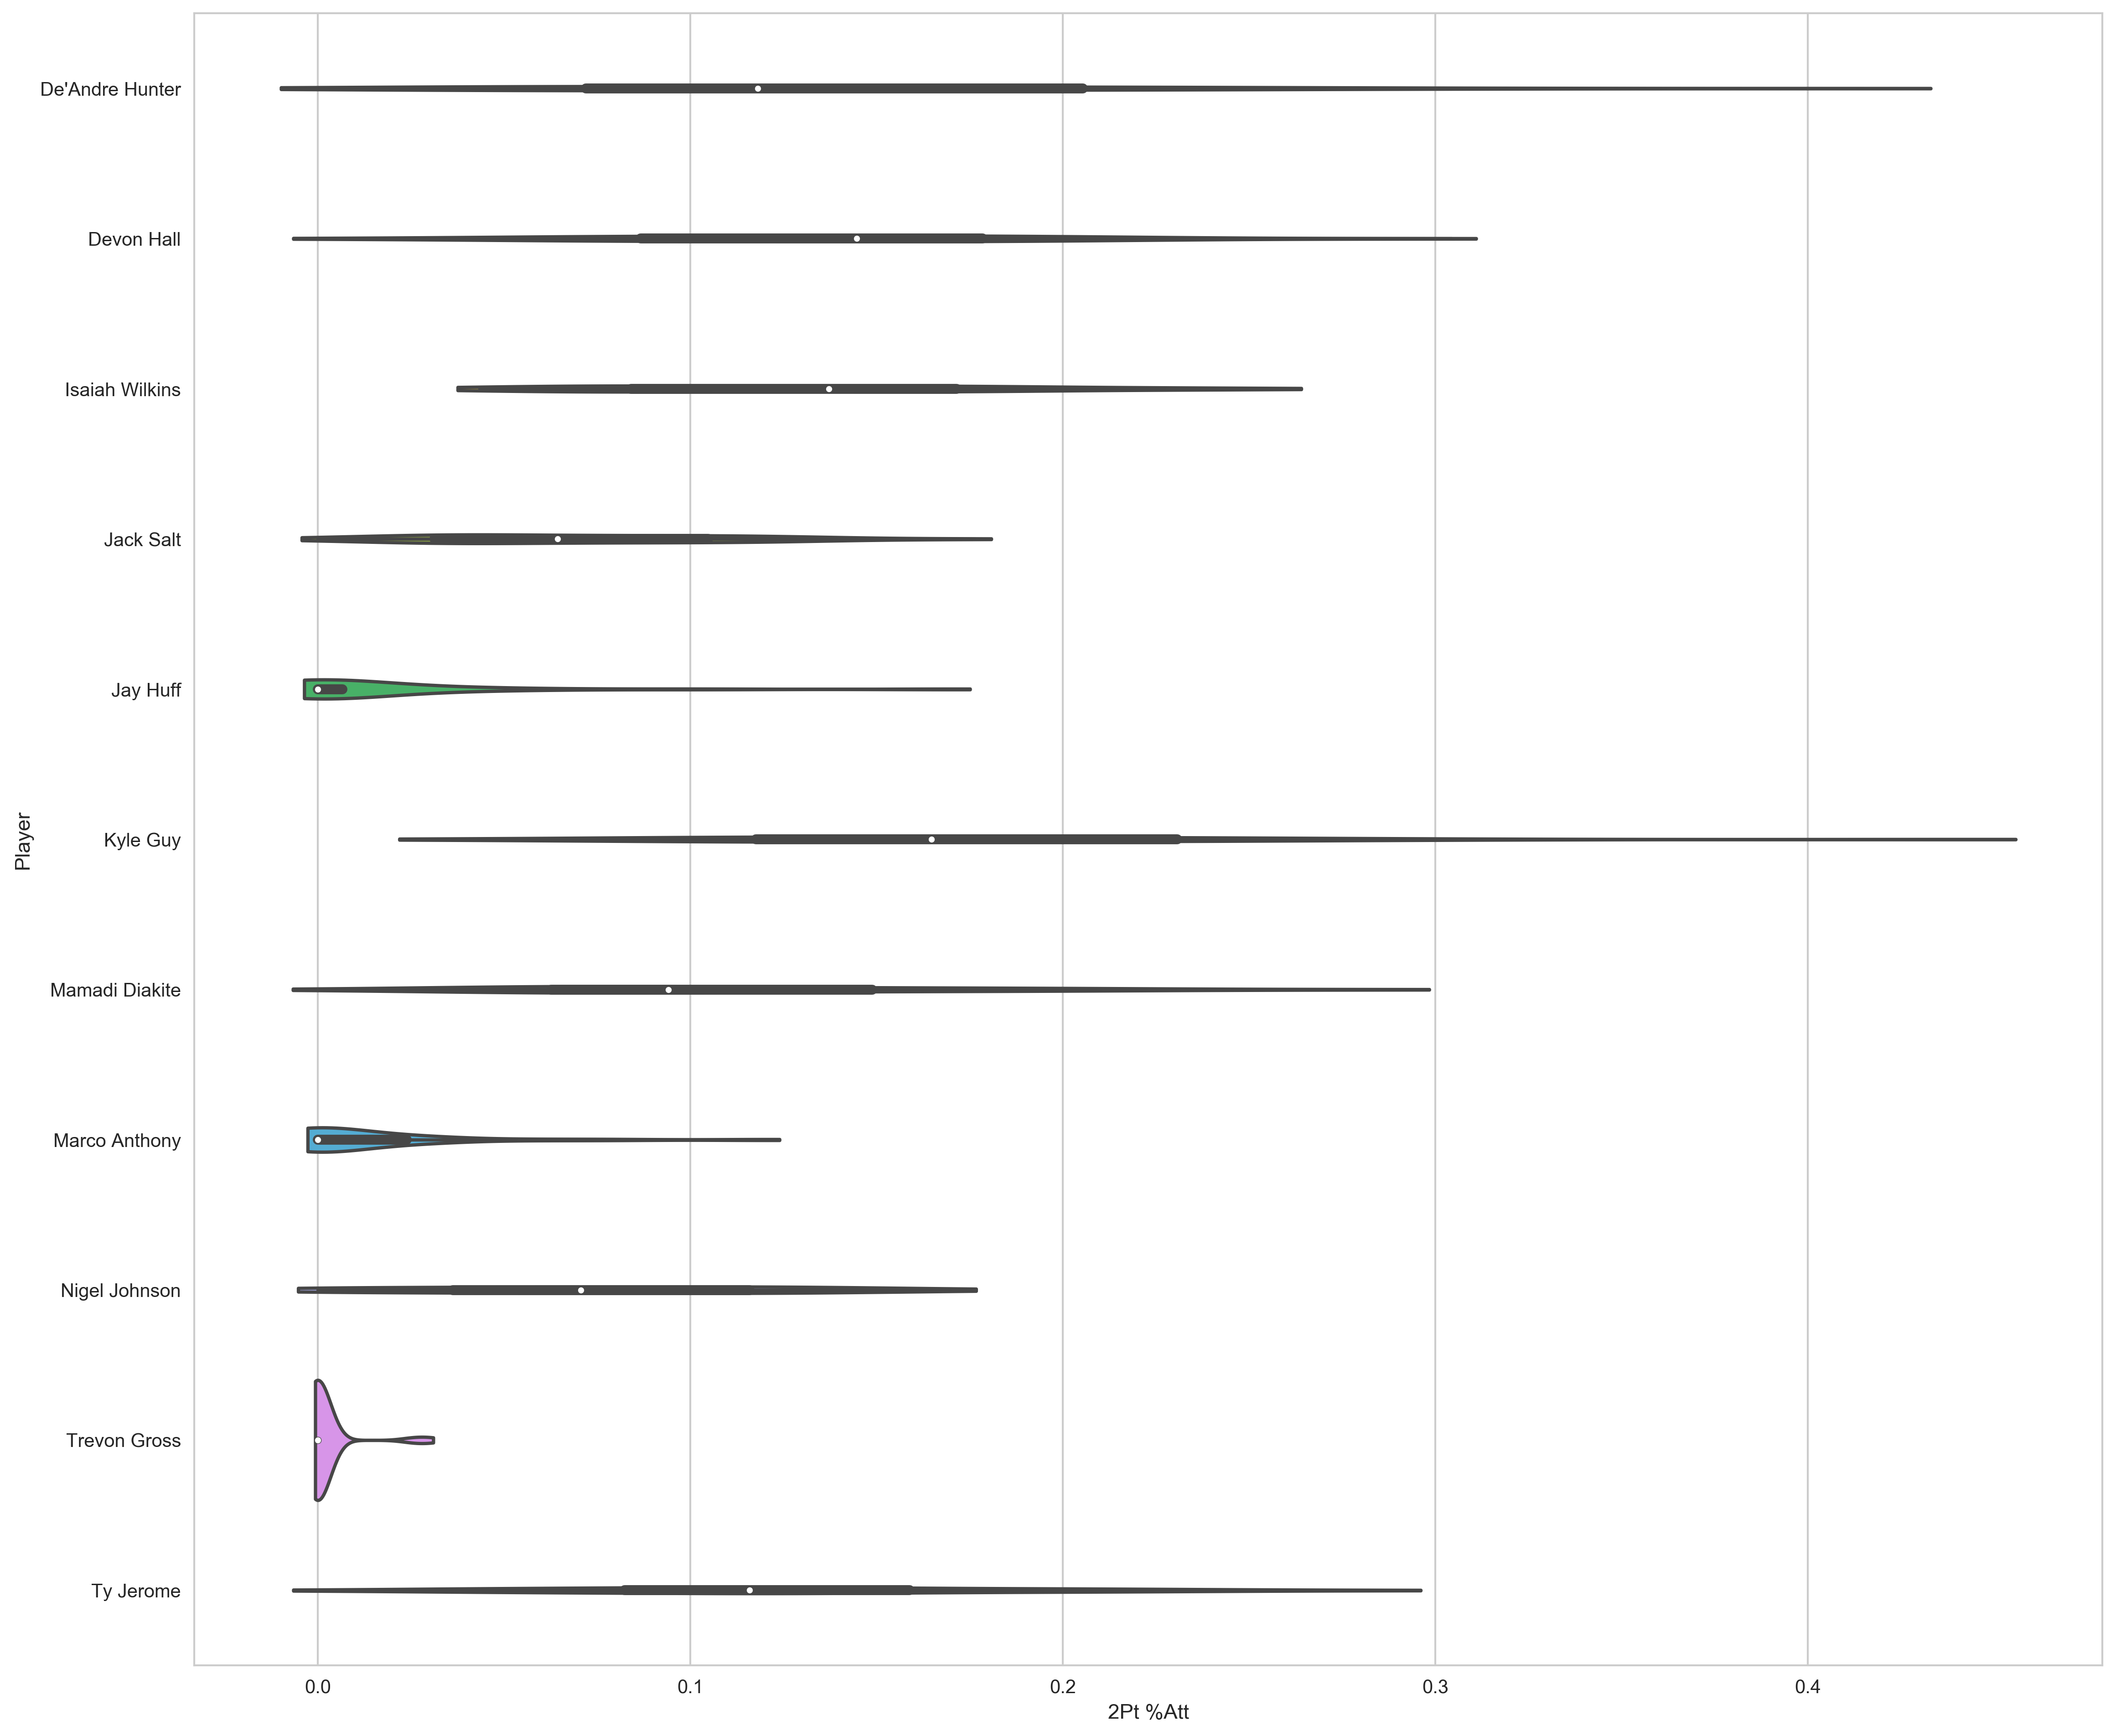

In [3]:
# Get stats for two pointers
NC_two_stats = []
NC_players = []
for player,dataframe in NC.items() :
    stats = list(dataframe['2Pt %Att'])
    player_name = len(stats)*[player]
    # Append them to lists
    for stat in stats :
        NC_two_stats.append(stat)
    for player in player_name :
        NC_players.append(player)
# Create the dataframe, then add info
NC_twos = pd.DataFrame()
NC_twos['2Pt %Att'] = NC_two_stats
NC_twos['Player'] = NC_players
# Create a violin plot for each player
sns.set_style('whitegrid')
fig = plt.figure(figsize=(18,16))
ax = sns.violinplot(x=NC_twos['2Pt %Att'],y=NC_twos['Player'],
                    data=NC_twos,order=NC.keys(),bw=.5,cut=.2)
plt.show()

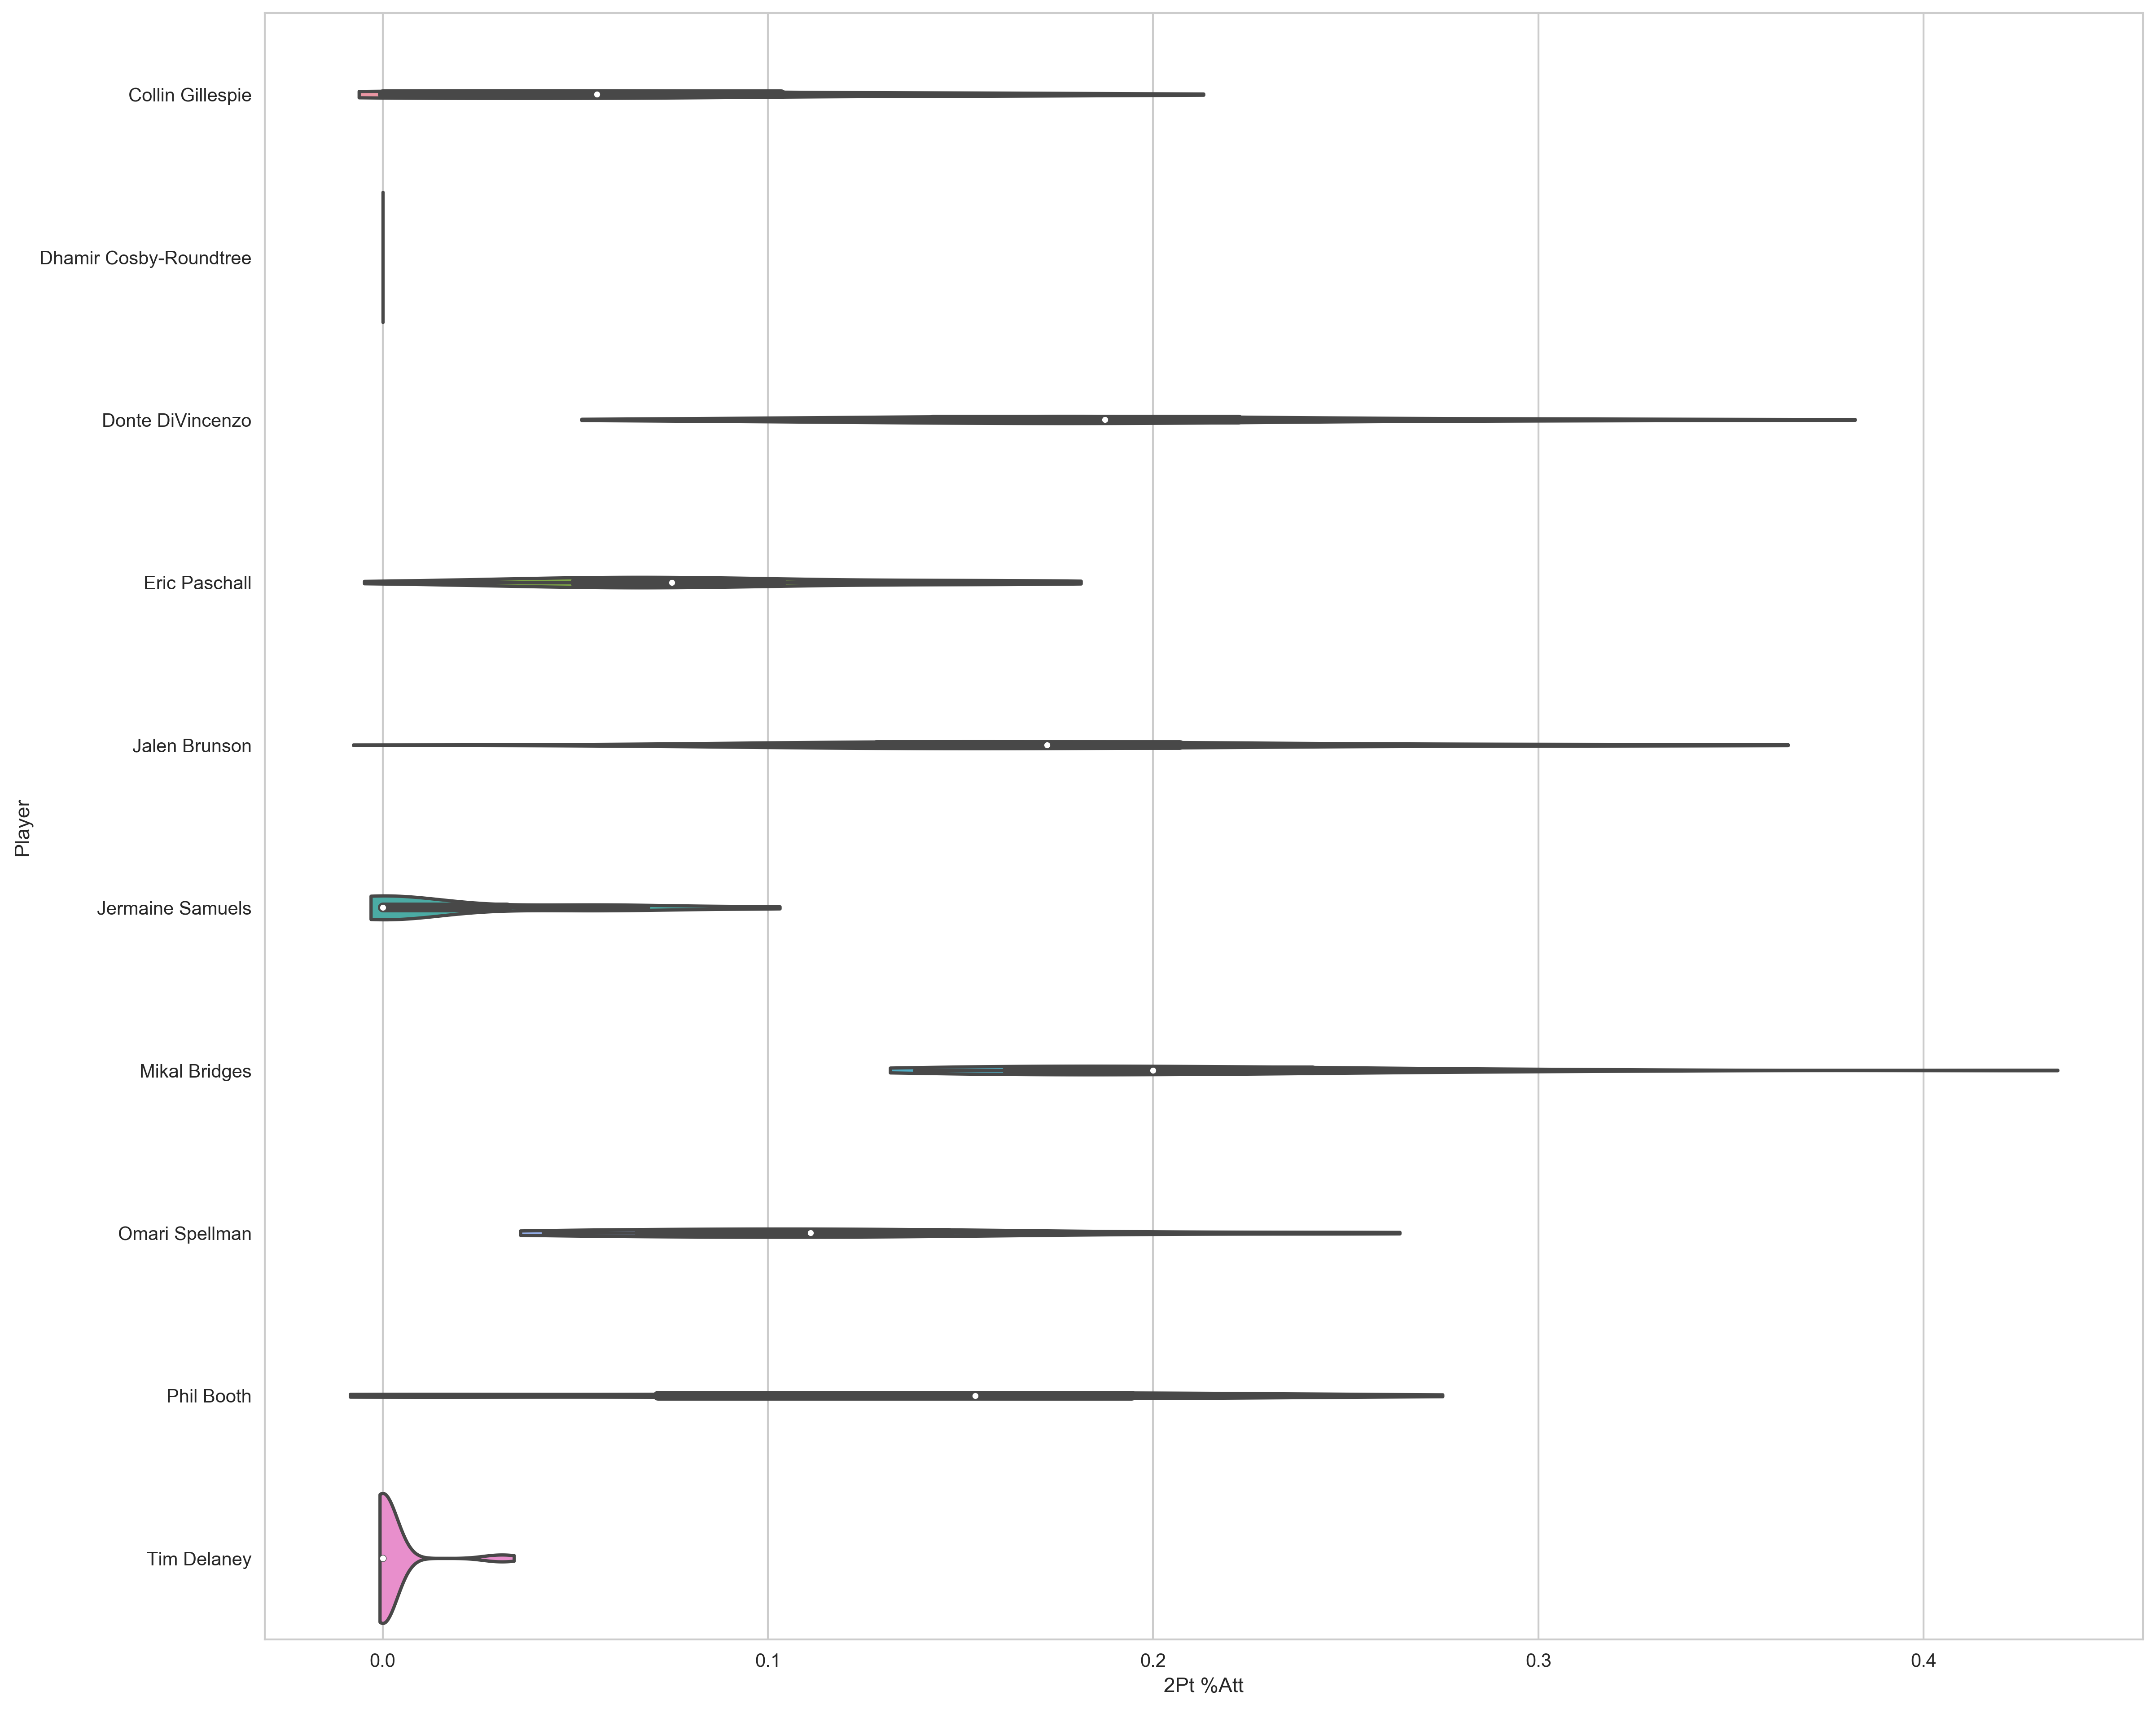

In [7]:
# Get stats for two pointers
Gz_two_stats = []
Gz_players = []
for player,dataframe in Gz.items() :
    stats = list(dataframe['3Pt %Att'])
    player_name = len(stats)*[player]
    # Append them to lists
    for stat in stats :
        Gz_two_stats.append(stat)
    for player in player_name :
        Gz_players.append(player)
# Create the dataframe, then add info
Gz_twos = pd.DataFrame()
Gz_twos['2Pt %Att'] = Gz_two_stats
Gz_twos['Player'] = Gz_players
# Create a violin plot for each player
sns.set_style('whitegrid')
fig = plt.figure(figsize=(18,16))
ax = sns.violinplot(x=Gz_twos['2Pt %Att'],y=Gz_twos['Player'],
                    data=Gz_twos,order=Gz.keys(),bw=.5,cut=.2)
plt.show()

In [8]:
'''
# NC vs Duke
NC_top_players = ['Theo Pinson','Joel Berry','Cameron Johnson',
                  'Sterling Manley','Luke Maye','Garrison Brooks',
                  'Kenny Williams','Jalek Felton']
Gz_top_players = ['Marvin Bagley','Wendell Carter','Trevon Duval',
                 'Gary Trent','Grayson Allen',"Alex O'Connell"]
'''
'''
# Butler
NC_top_players = ['Kamar Baldwin','Kelan Martin','Tyler Wideman',
                  'Paul Jorgensen','Nate Fowler','Aaron Thompson',
                  'Sean McDermott','Henry Baddley']
Gz_top_players = ['Daxter Miles','Jevon Carter','Sagaba Konate',
                  'Teddy Allen','Lamont West','Esa Ahmad',
                  'James Bolden','Wesley Harris']
'''
'''
# Florida
Gz_top_players = ['Egor Koulechov','Chris Chiozza','Jalen Hudson',
                  'Keith Stone','KeVaughn Allen','Kevarrius Hayes',
                  'Deaundrae Ballard','Mike Okauru']
'''
'''
# Purdue
Gz_top_players = ['Isaac Haas','Vincent Edwards','Carsen Edwards',
                  'Matt Haarms','Dakota Mathias','Nojel Eastern',
                  'PJ Thompson','Ryan Cline']
'''

# Virginia vs Villanova
NC_top_players = ['Kyle Guy','Devon Hall','Ty Jerome','Nigel Johnson',
                  "De'Andre Hunter",'Mamadi Diakite','Isaiah Wilkins',
                  'Jack Salt']
Gz_top_players = ['Jalen Brunson','Mikal Bridges','Donte DiVincenzo',
                  'Omari Spellman','Eric Paschall','Phil Booth',
                  'Collin Gillespie','Dhamir Cosby-Roundtree']
# Create dictionaries of the top players
NC_top = {key:value for key,value in NC.items() if key in NC_top_players}
Gz_top = {key:value for key,value in Gz.items() if key in Gz_top_players}

In [9]:
# Create avgs dictionary
NC_avgs, NC_data = df.create_avgs(NC_top)
Gz_avgs, Gz_data = df.create_avgs(Gz_top)

In [10]:
avg_columns = ['2Pt %','3Pt %','FT %','2Pt %Att','3Pt %Att',
               'FT %Att','Pts','Pnts-Prev']
# Create team dataframes of average data
NC_avgs_data = pd.DataFrame(NC_data.T,
                            index=avg_columns,
                            columns=NC_avgs.keys())
Gz_avgs_data = pd.DataFrame(Gz_data.T,
                            index=avg_columns,
                            columns=Gz_avgs.keys())

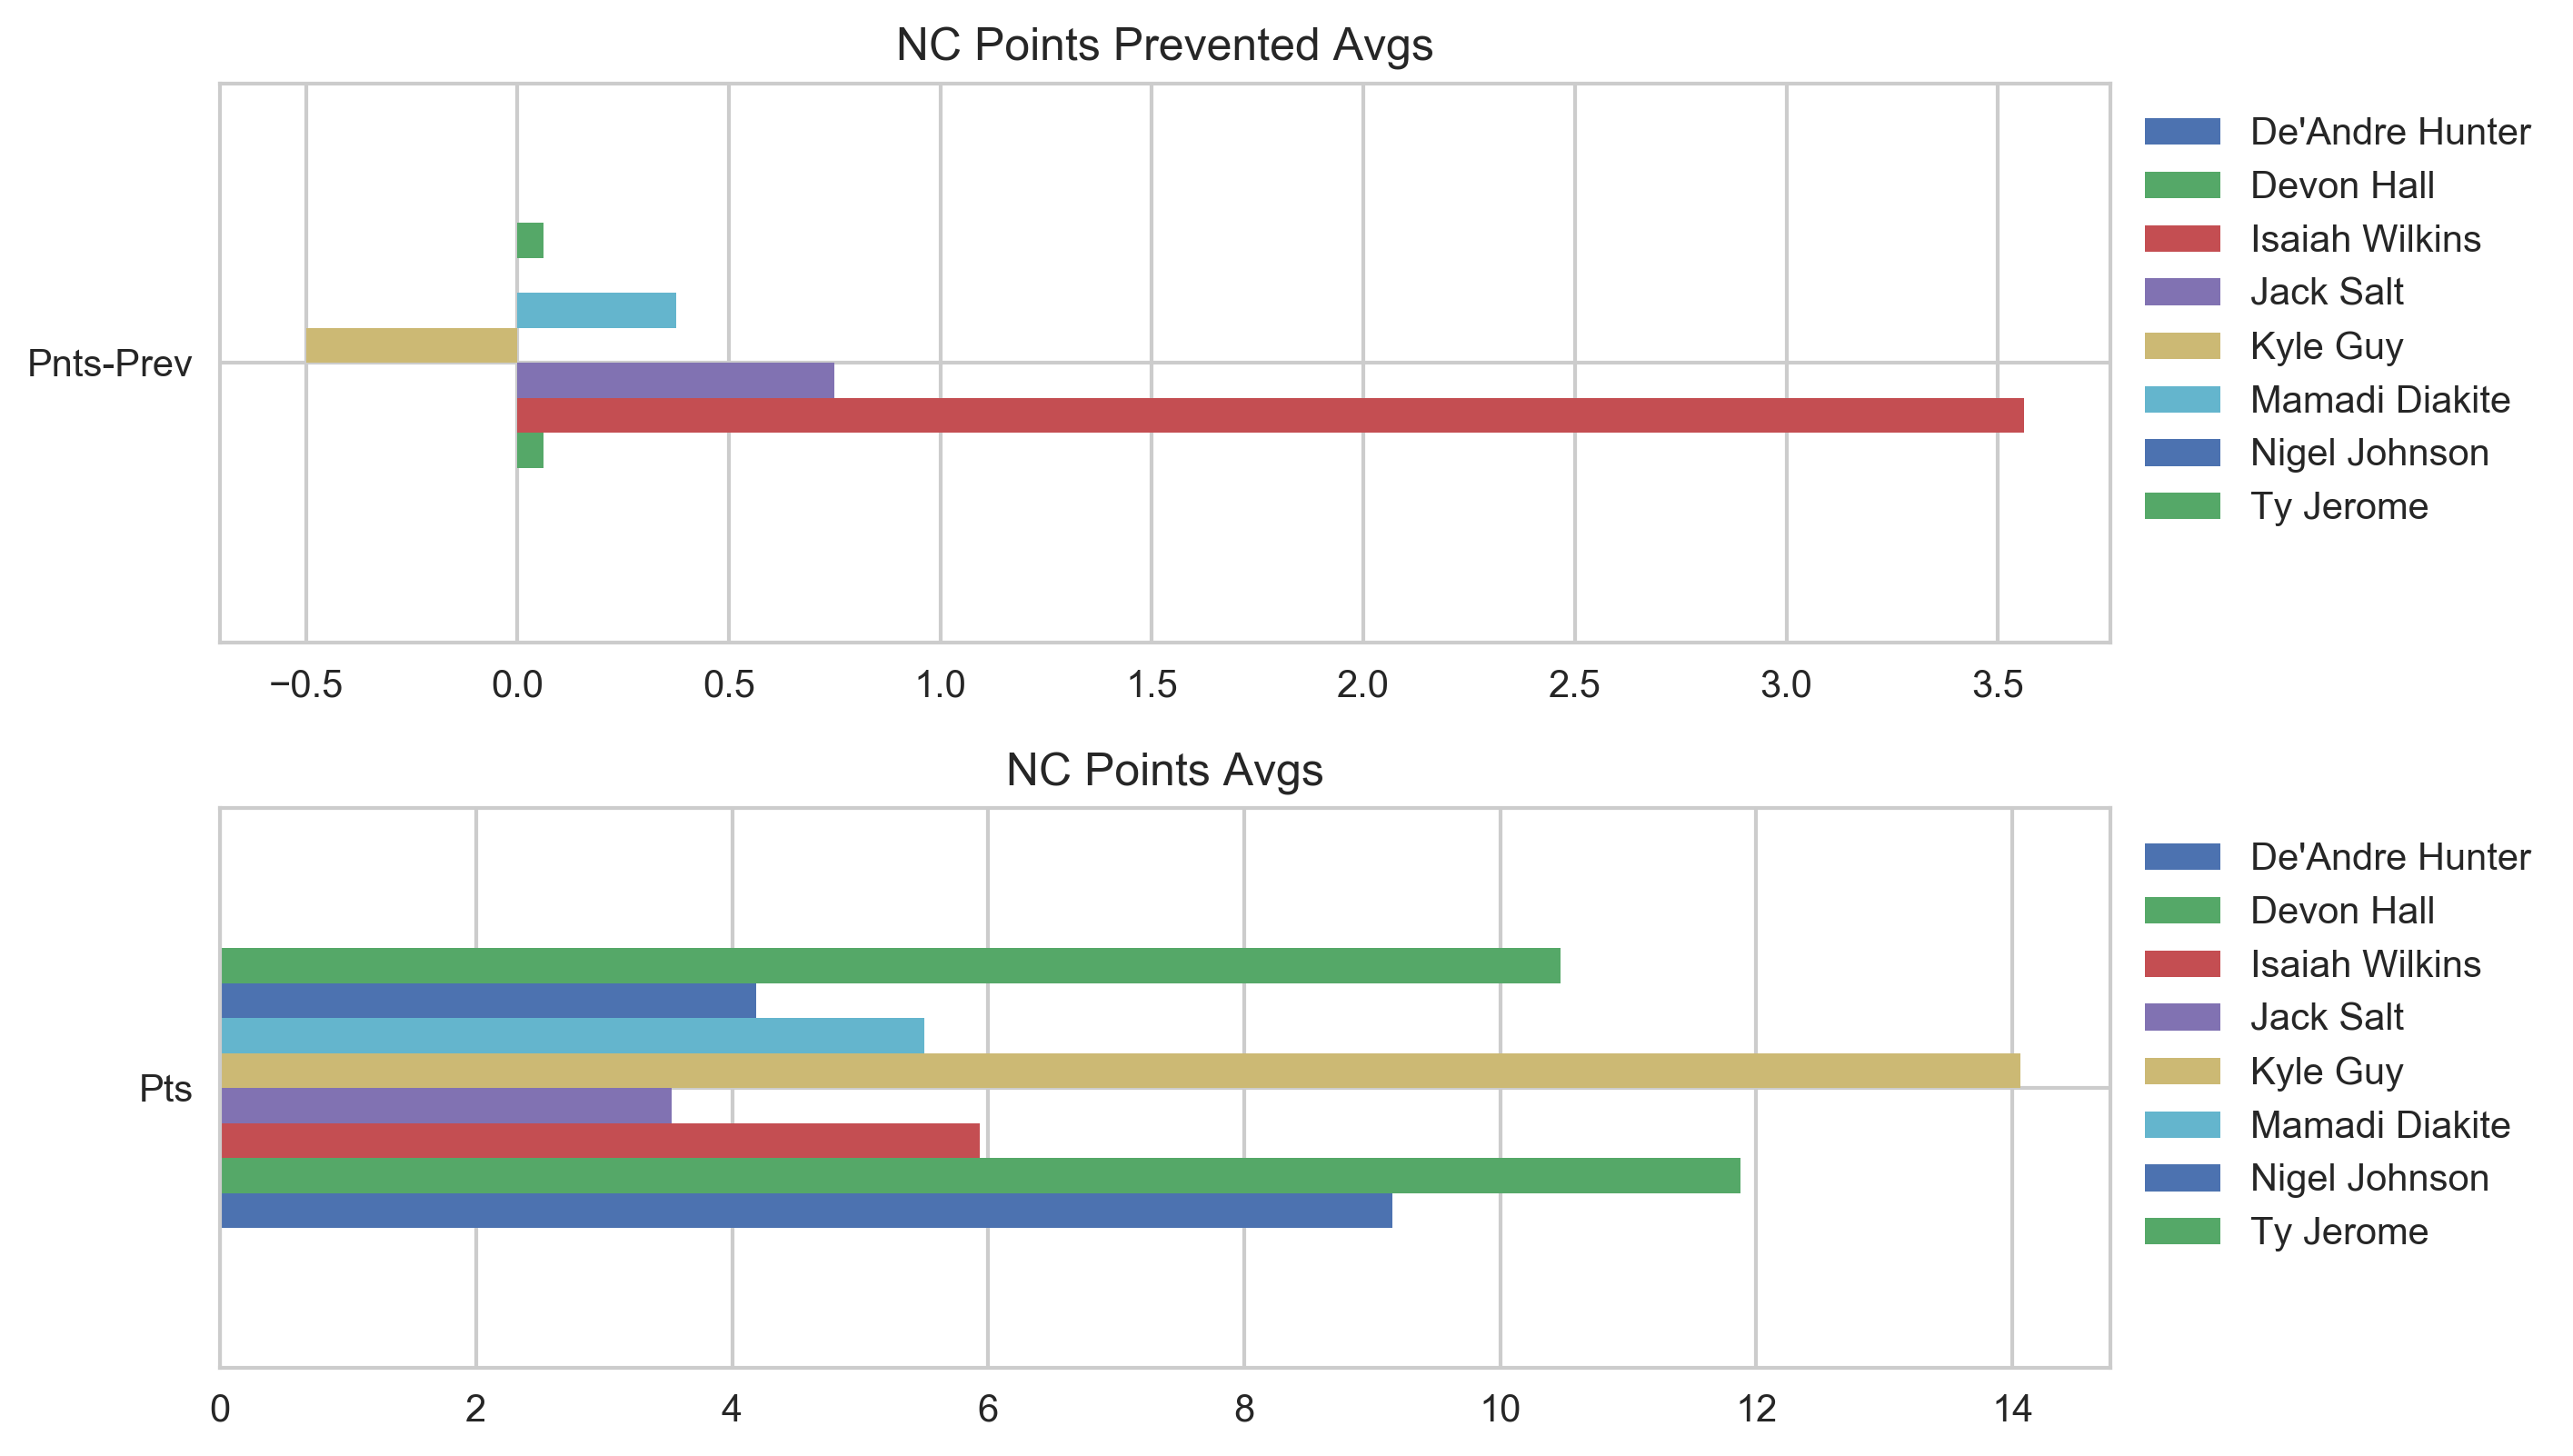

In [11]:
# Figure with 2 subplots
fig, [ax1,ax2] = plt.subplots(2, 1)
NC_pts_prevented = NC_avgs_data.drop(['2Pt %','3Pt %','FT %',
                                      'FT %Att','3Pt %Att',
                                      '2Pt %Att','Pts'])
NC_pts_prevented.plot(kind='barh',
                      title='NC Points Prevented Avgs',ax=ax1)
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
NC_pts = NC_avgs_data.drop(['2Pt %','3Pt %','FT %',
                            'FT %Att','3Pt %Att',
                            '2Pt %Att','Pnts-Prev'])
NC_pts.plot(kind='barh',title='NC Points Avgs',ax=ax2)
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()

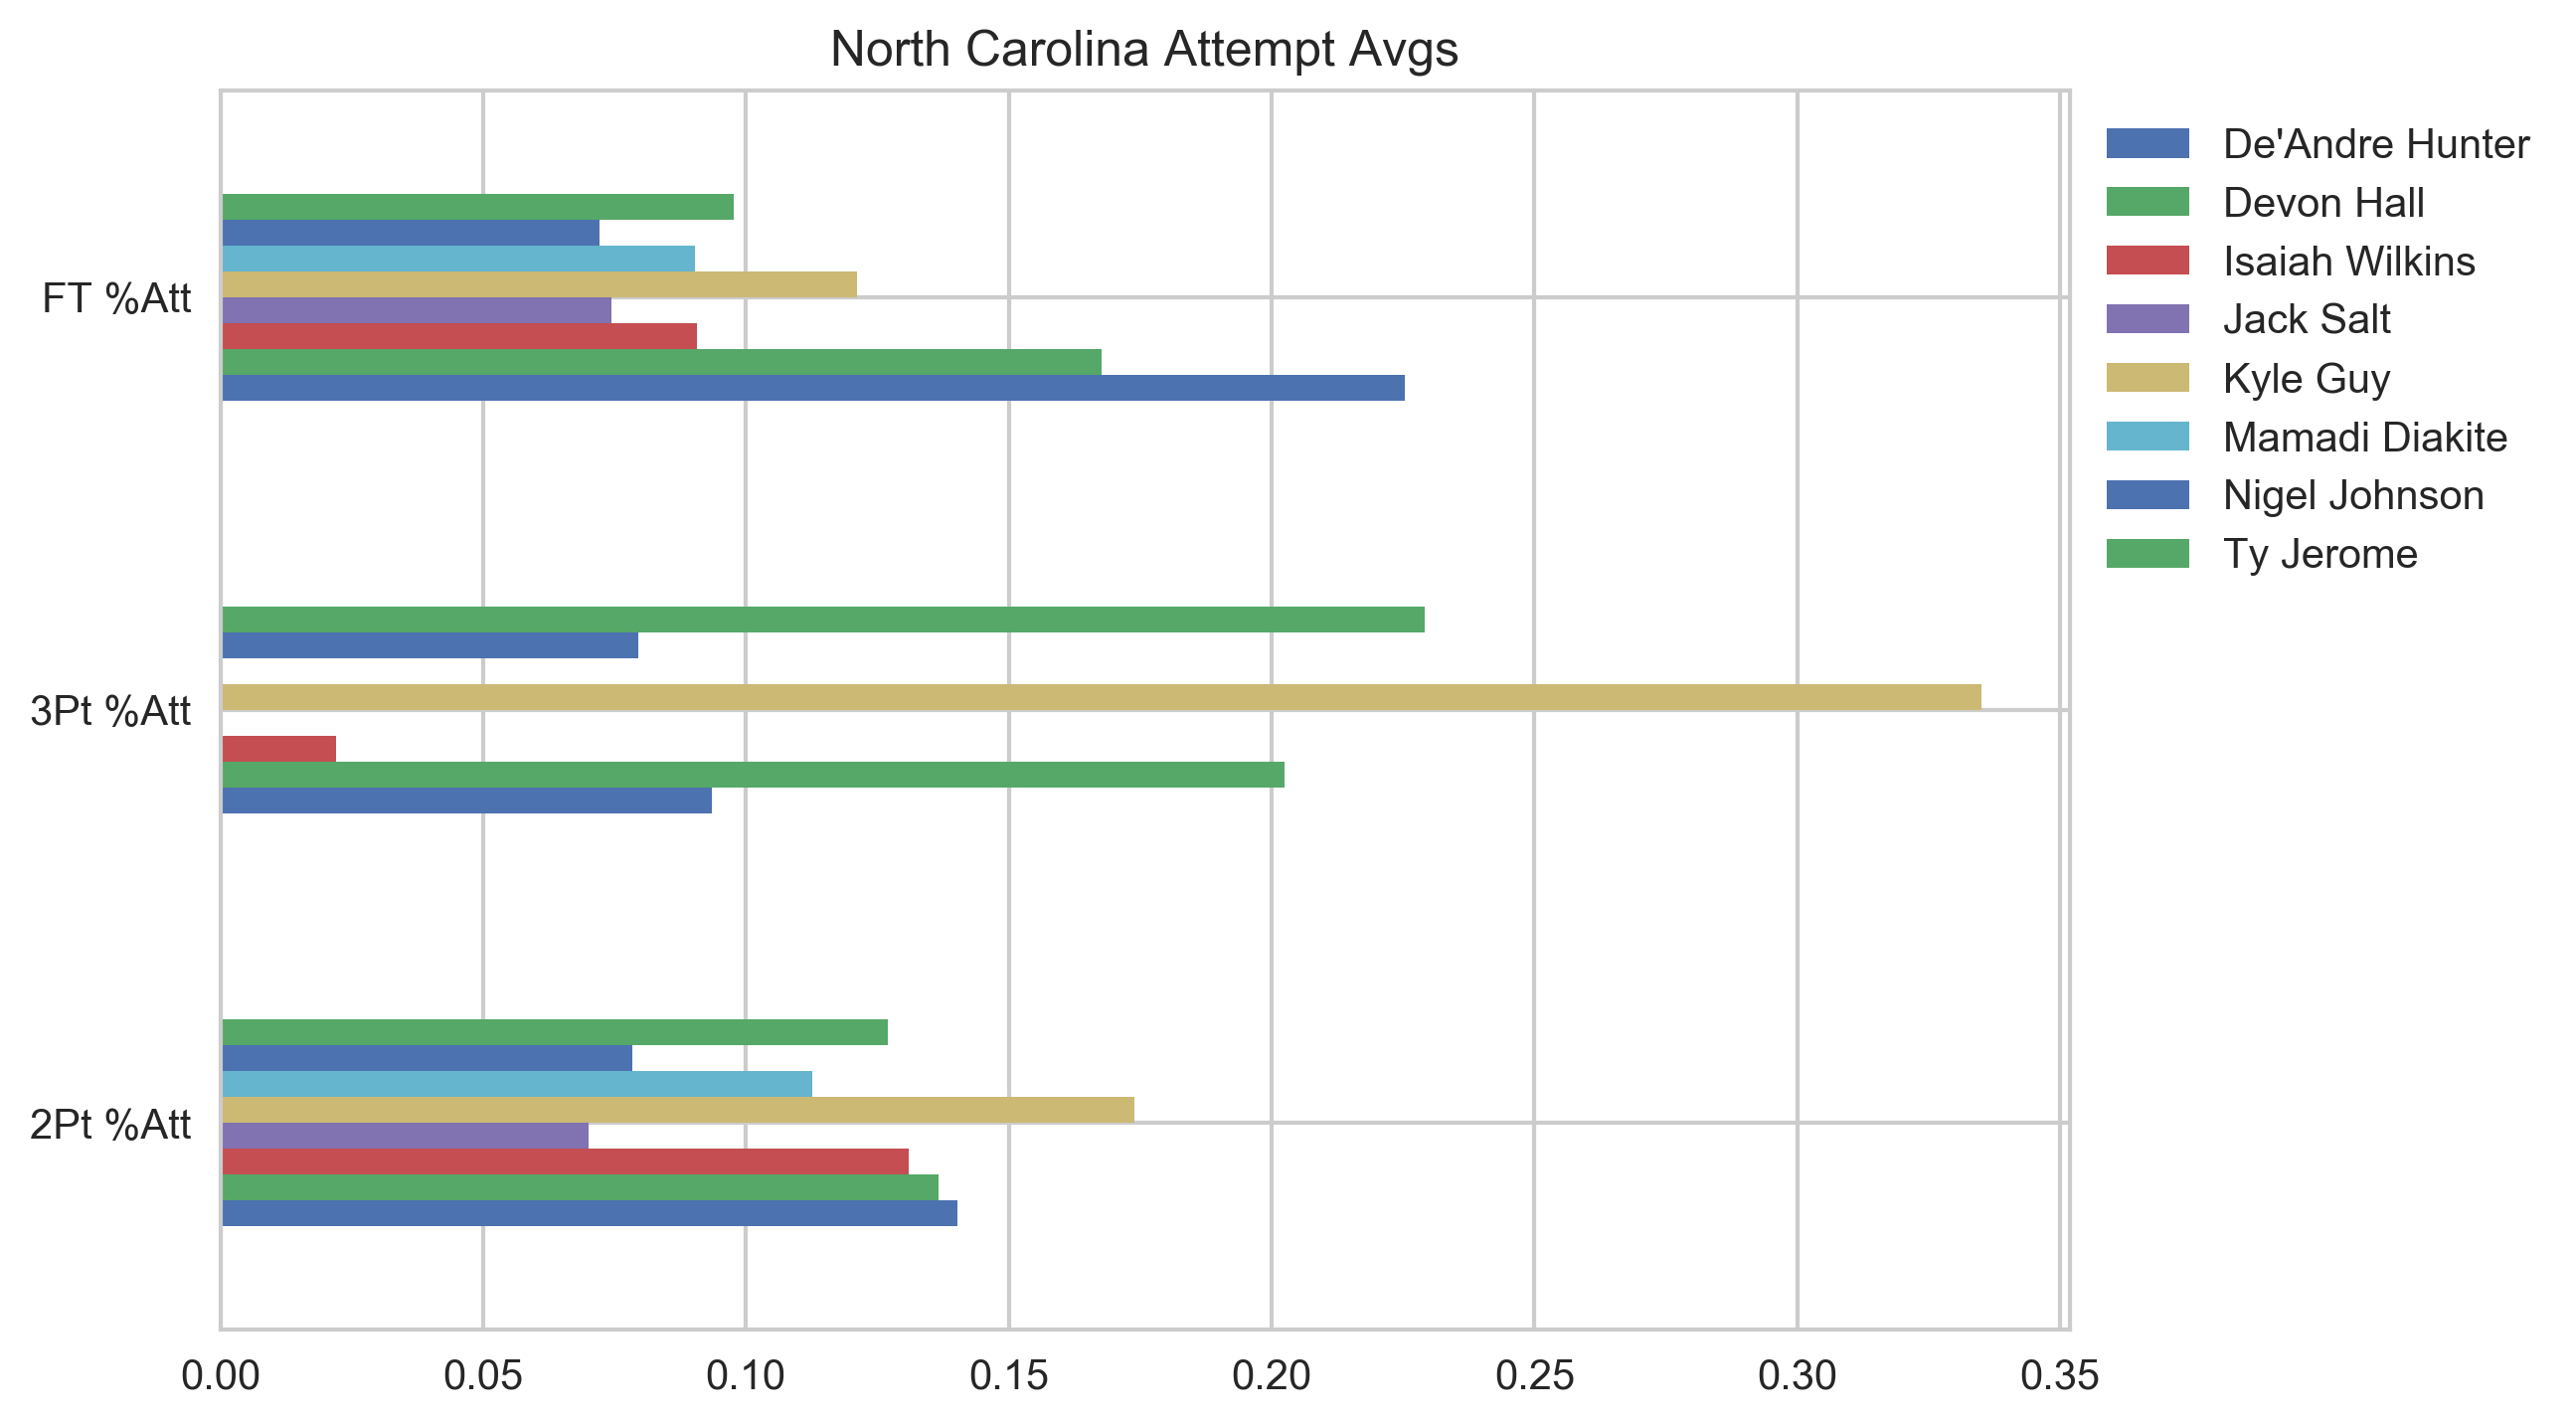

In [12]:
NC_pnts_dropped = NC_avgs_data.drop(['2Pt %','3Pt %','FT %',
                                     'Pnts-Prev','Pts'])
NC_pnts_dropped.plot(kind='barh',title='North Carolina Attempt Avgs')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

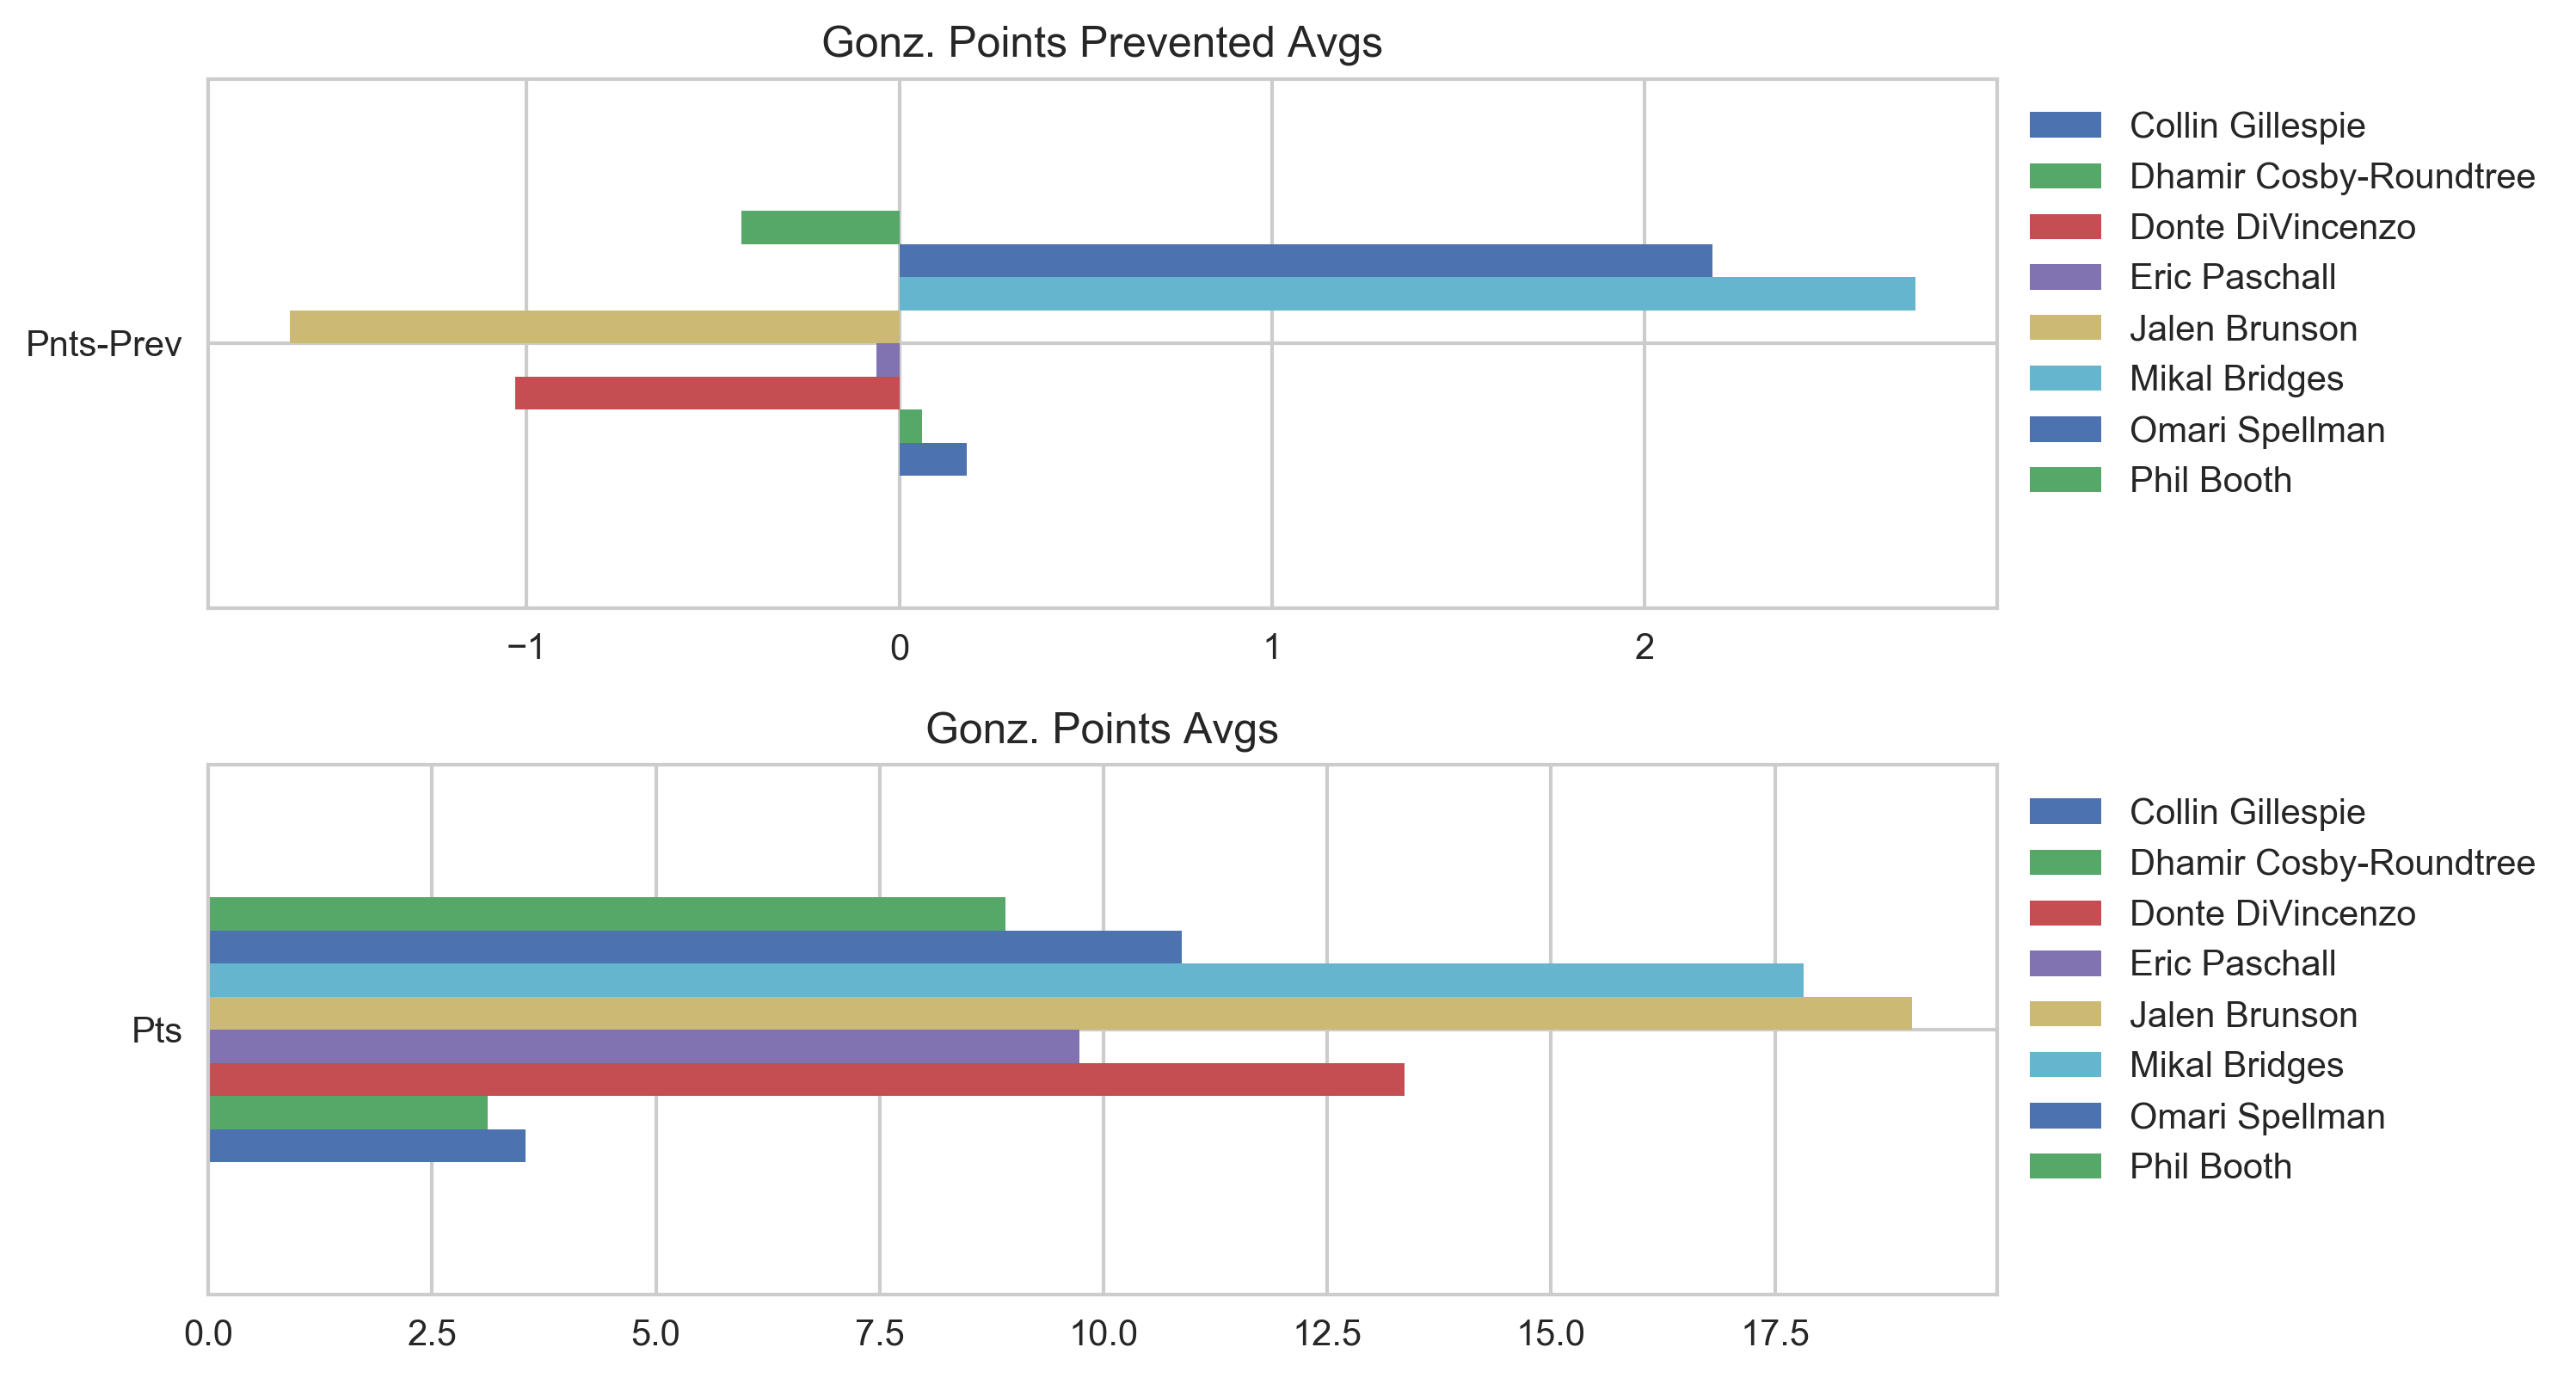

In [13]:
fig, [ax1,ax2] = plt.subplots(2, 1)
G_pts_prev = Gz_avgs_data.drop(['2Pt %','3Pt %','FT %',
                                'FT %Att','3Pt %Att',
                                '2Pt %Att','Pts'])
G_pts_prev.plot(kind='barh',
                title='Gonz. Points Prevented Avgs',ax=ax1)
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
G_pts = Gz_avgs_data.drop(['2Pt %','3Pt %','FT %',
                           'FT %Att','3Pt %Att',
                           '2Pt %Att','Pnts-Prev'])
G_pts.plot(kind='barh',title='Gonz. Points Avgs',ax=ax2)
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()

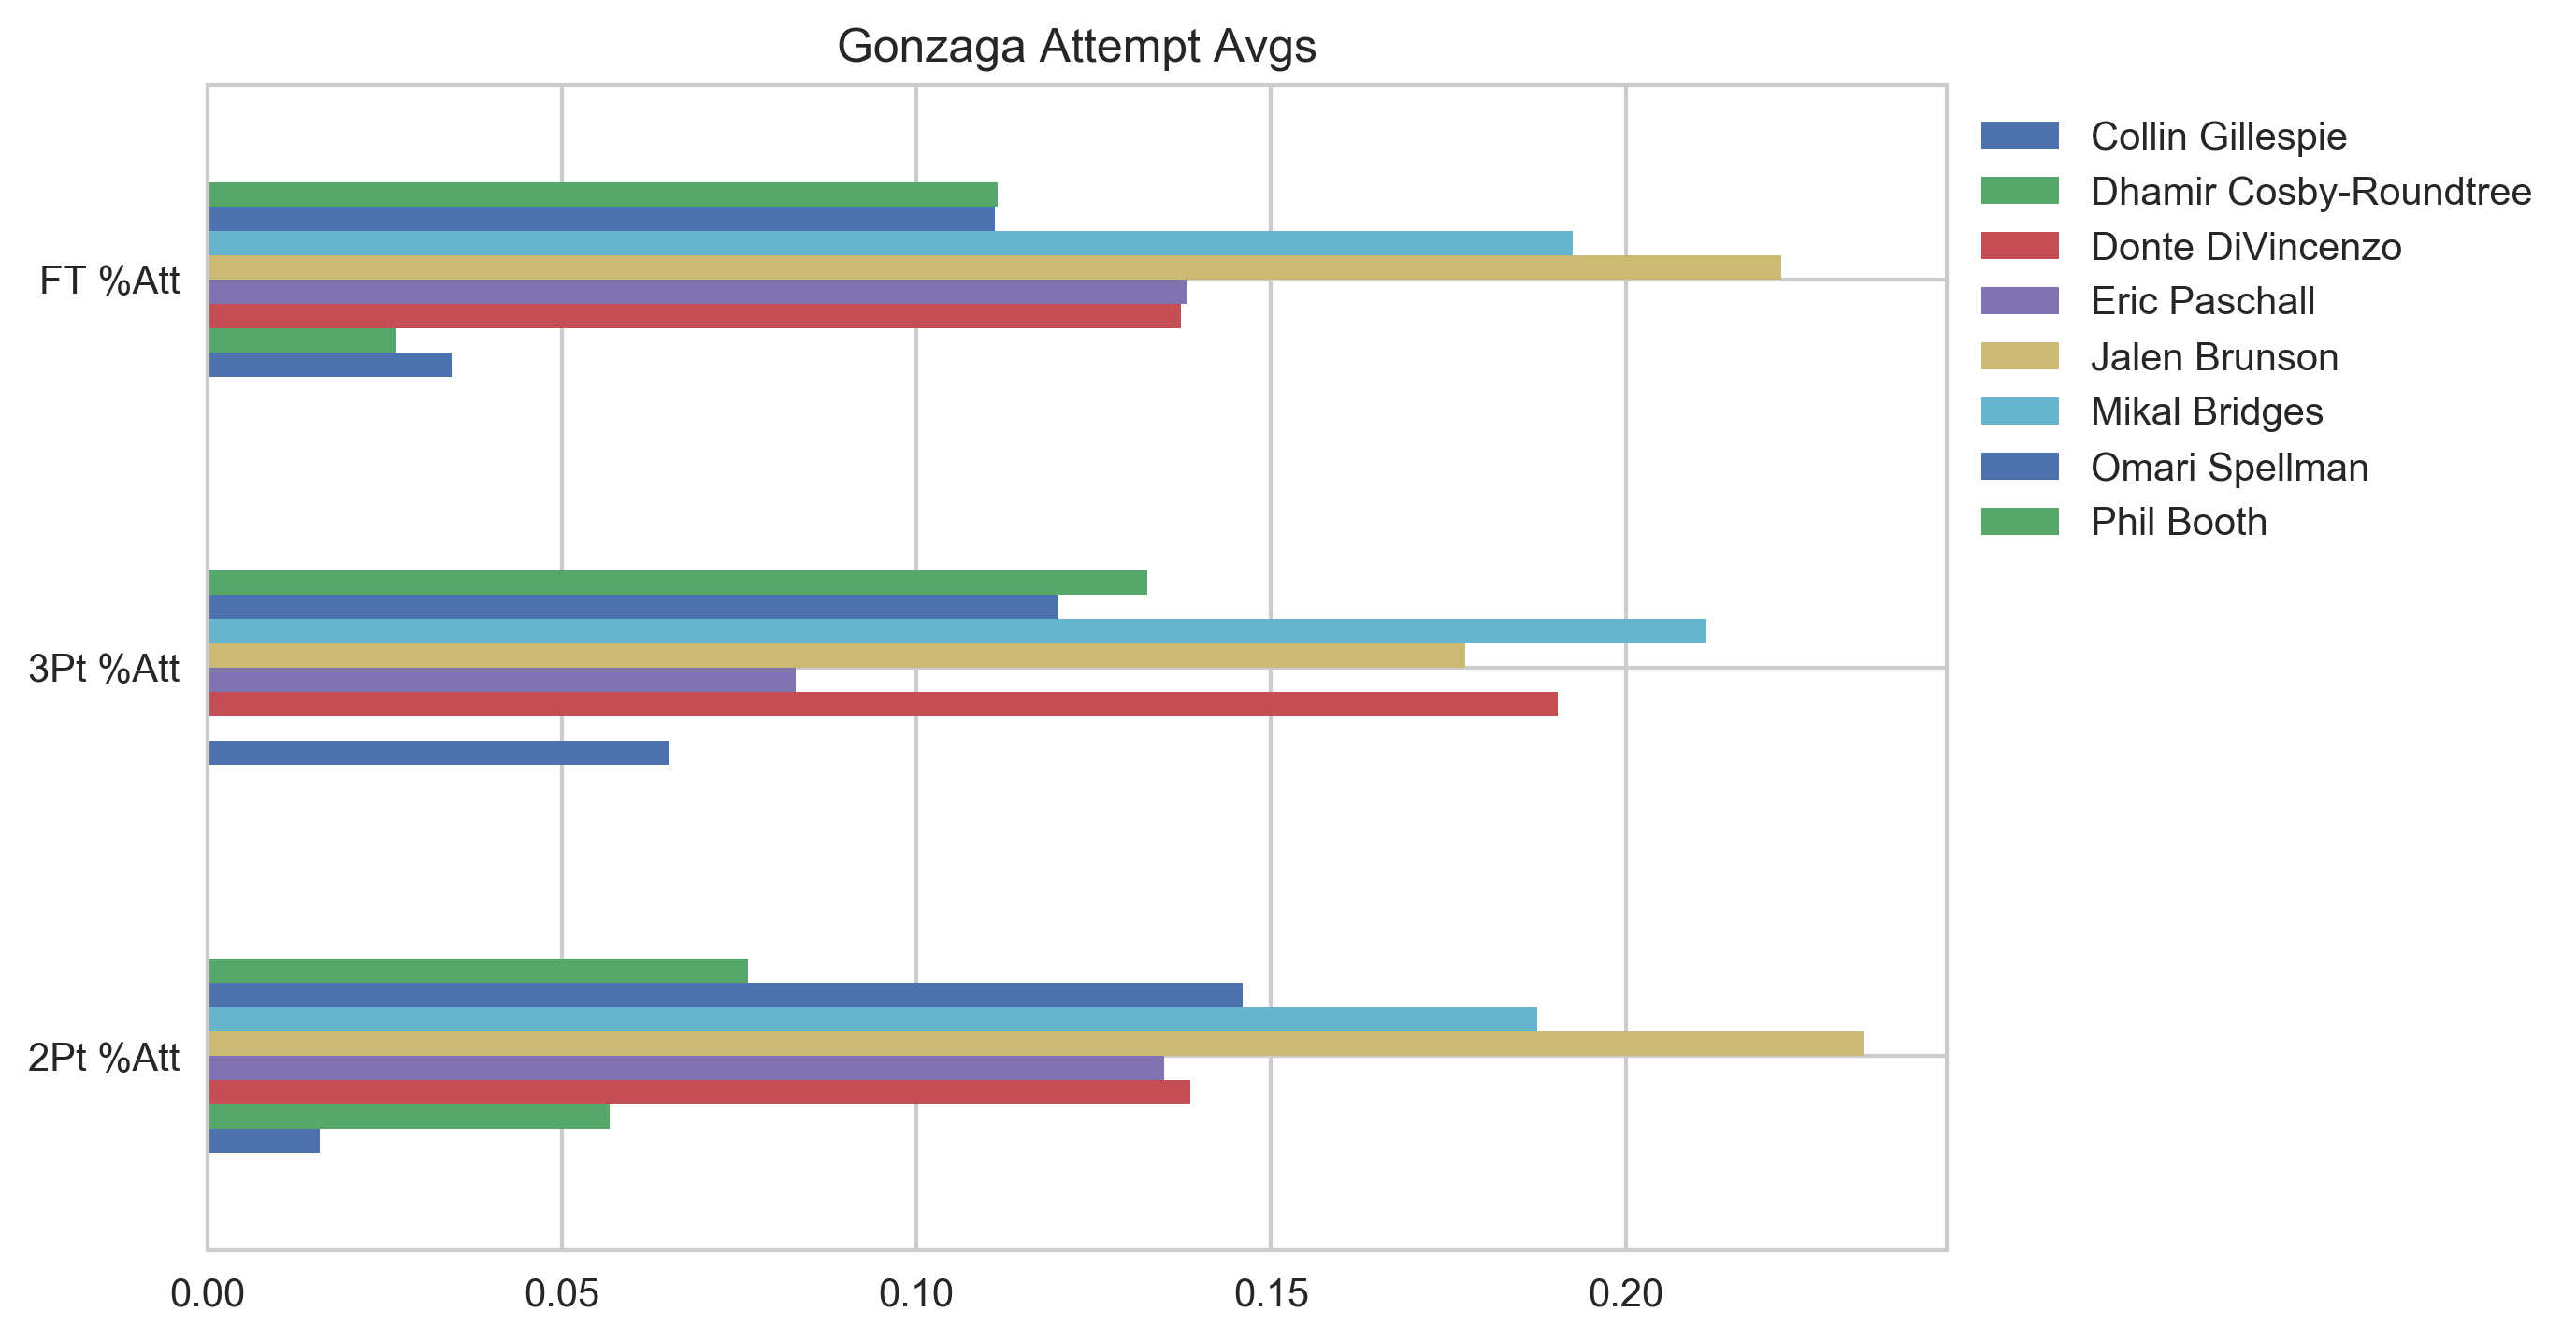

In [14]:
G_pnts_dropped = Gz_avgs_data.drop(['2Pt %','3Pt %','FT %',
                                    'Pnts-Prev','Pts'])
G_pnts_dropped.plot(kind='barh',title='Gonzaga Attempt Avgs')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

In [15]:
# Load scouting reports and drop repeated index column
NC_scout = pd.read_csv('./DATA/2017/North Carolina/Scouting_Report_csv')
NC_scout = NC_scout.drop('Unnamed: 0',axis=1)
Gz_scout = pd.read_csv('./Data/2017/Gonzaga/Scouting_Report_csv')
Gz_scout = Gz_scout.drop('Unnamed: 0',axis=1)

In [16]:
# Find pos len [row 2]
NC_off_pos_len = float(NC_scout.loc[2]['Offense'])
NC_def_pos_len = float(NC_scout.loc[2]['Defense'])
Gz_off_pos_len = float(Gz_scout.loc[2]['Offense'])
Gz_def_pos_len = float(Gz_scout.loc[2]['Defense'])
# Average one teams offense w/ the other's defense
NC_offense = (NC_off_pos_len + Gz_def_pos_len) / 2
Gz_offense = (Gz_off_pos_len + NC_def_pos_len) / 2
# 40 minutes of gameplay -> 2400 seconds
# Allot each team time based on tempo [row 1]
time = 2400
NC_tempo = float(NC_scout.loc[1]['Offense'])
Gz_tempo = float(Gz_scout.loc[1]['Defense'])
NC_time = NC_tempo / (NC_tempo + Gz_tempo) * time
Gz_time = Gz_tempo / (NC_tempo + Gz_tempo) * time
# Get number of possessions
NC_num_poss = round(NC_time / NC_offense)
Gz_num_poss = round(Gz_time / Gz_offense)

In [17]:
# Get turnover percentage for each team
NC_off_turn = float(NC_scout.loc[4]['Offense'])
NC_def_turn = float(NC_scout.loc[4]['Defense'])
Gz_off_turn = float(Gz_scout.loc[4]['Offense'])
Gz_def_turn = float(Gz_scout.loc[4]['Defense'])
# Calculated Predicted turnover rate
NC_turn_over = (NC_off_turn + Gz_def_turn) / 2
Gz_turn_over = (Gz_off_turn + NC_def_turn) / 2
# Get num of scoring possessions
# Remove turnover possessions
NC_scor_poss = round(NC_num_poss*(1 - NC_turn_over / 100))
Gz_scor_poss = round(Gz_num_poss*(1 - Gz_turn_over / 100))

In [18]:
# Get distribution numbers
NC_3s = float(NC_scout.loc[15]['Offense']) / 100
NC_2s = float(NC_scout.loc[16]['Offense']) / 100
NC_ft = float(NC_scout.loc[17]['Offense']) / 100
Gz_3s = float(Gz_scout.loc[15]['Offense']) / 100
Gz_2s = float(Gz_scout.loc[16]['Offense']) / 100
Gz_ft = float(Gz_scout.loc[17]['Offense']) / 100
# Get number of possessions for each score type
NC_3_atts = round(NC_scor_poss * NC_3s)
NC_2_atts = round(NC_scor_poss * NC_2s)
NC_1_atts = round(NC_scor_poss * NC_ft)
Gz_3_atts = round(Gz_scor_poss * Gz_3s)
Gz_2_atts = round(Gz_scor_poss * Gz_2s)
Gz_1_atts = round(Gz_scor_poss * Gz_ft)
# Fix rounding error
# Since 2 pt shots are most common, add or subtract from there
NC_error = NC_3_atts + NC_2_atts + NC_1_atts - NC_scor_poss
if NC_error != 0 :
    NC_2_atts -= NC_error
Gz_error = Gz_3_atts + Gz_2_atts + Gz_1_atts - Gz_scor_poss
if Gz_error != 0 :
    Gz_2_atts -= Gz_error

In [19]:
# Get score distributions and points prevented
NC_scores = df.find_points(NC_avgs,NC_3_atts,NC_2_atts,NC_1_atts)
Gz_scores = df.find_points(Gz_avgs,Gz_3_atts,Gz_2_atts,Gz_1_atts)

In [20]:
# Get final scores
NC_3 = 3*(sum([NC_scores[player][0] for player in NC_scores.keys()]))
NC_2 = 2*(sum([NC_scores[player][1] for player in NC_scores.keys()]))
NC_1 = sum([NC_scores[player][2] for player in NC_scores.keys()])
Gz_3 = 3*(sum([Gz_scores[player][0] for player in Gz_scores.keys()]))
Gz_2 = 2*(sum([Gz_scores[player][1] for player in Gz_scores.keys()]))
Gz_1 = sum([Gz_scores[player][2] for player in Gz_scores.keys()])
print('NC Score: ' + str(NC_3 + NC_2 + NC_1))
print('Gz Score: ' + str(Gz_3 + Gz_2 + Gz_1))

NC Score: 58.0
Gz Score: 70.0
